In [55]:
from data_preprocessing import get_X_y
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Set up data

In [56]:
X, y = get_X_y()
X.head()

,year,length_ft,beam_ft,numEngines,totalHP,sellerId,created_month,created_year,type_sail,boatClass_power-aluminum,...,zip_98362,zip_98382,zip_98402,zip_98408,zip_98501,zip_98502,zip_98516,zip_99336,zip_99501,zip_99508
0,-2.286818,-0.269861,-0.046811,-0.384842,-0.307611,2.845810,1.187498,0.669316,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.357858,1.747749,0.651431,1.744345,1.542000,-0.074647,0.885516,0.669316,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.561294,-0.588431,-0.348452,-0.384842,-0.521027,2.905252,1.489479,0.669316,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.052703,0.898229,0.464302,1.744345,0.972889,-0.233960,0.885516,0.669316,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-2.083381,2.172508,1.768620,1.744345,1.257445,-0.519460,0.583534,-0.442995,False,False,...,False,False,False,False,False,False,False,False,False,False


In [57]:
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.8, random_state=0)

# Get number of components

In [58]:
n_comp = 18
print('number of components', n_comp)

number of components 18


In [59]:
cols = ['PC-'+str(i+1) for i in range(n_comp)]

PC-1     0.23
PC-2     0.09
PC-3     0.07
PC-4     0.06
PC-5     0.05
PC-6     0.03
PC-7     0.03
PC-8     0.02
PC-9     0.02
PC-10    0.02
PC-11    0.01
PC-12    0.01
PC-13    0.01
PC-14    0.01
PC-15    0.01
PC-16    0.01
PC-17    0.01
PC-18    0.01
dtype: float64


<Axes: title={'center': 'PVE'}>

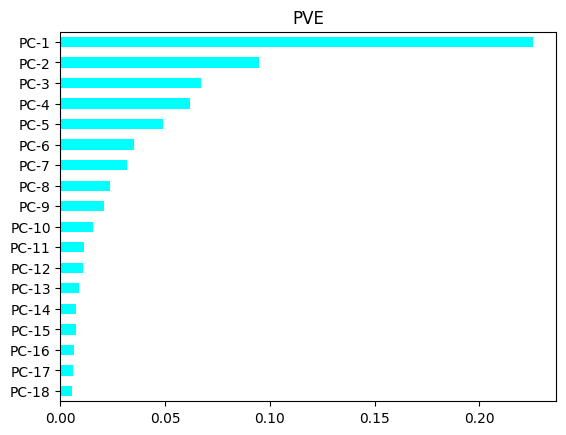

In [60]:
pca = PCA(n_components=n_comp)
pca.fit(X_train)
PVE = pca.explained_variance_ratio_
PVE = pd.Series(PVE,index=cols)
print(PVE.round(2))
PVE.sort_values().plot.barh(color='cyan',title='PVE')

# Analyze Components

In [61]:
sum(PVE)

0.6888917891086485

In [62]:
components = pd.DataFrame(pca.components_, columns=X.columns)
components.head()

,year,length_ft,beam_ft,numEngines,totalHP,sellerId,created_month,created_year,type_sail,boatClass_power-aluminum,...,zip_98362,zip_98382,zip_98402,zip_98408,zip_98501,zip_98502,zip_98516,zip_99336,zip_99501,zip_99508
0,-0.326399,0.484109,0.369210,0.423757,0.465206,-0.025627,0.041114,-0.141552,0.011709,-0.036344,...,0.000117,0.000336,0.000126,-0.001629,0.000179,0.000053,-0.001016,-0.000607,-0.000062,-1.078062e-04
1,-0.072760,-0.088834,-0.143378,-0.030457,-0.099937,-0.043333,0.702376,-0.673290,0.005819,-0.004368,...,0.000146,-0.000364,0.000255,-0.000573,-0.000137,-0.000077,-0.001900,0.000068,-0.000129,4.362133e-07
2,-0.013369,0.028024,0.100802,-0.050512,-0.004648,0.978987,0.105420,0.021700,-0.002580,0.004410,...,0.000398,0.000134,-0.000092,0.000807,0.000118,0.000029,0.005129,-0.001452,0.000003,7.217938e-05
3,-0.754558,-0.096920,-0.174465,-0.274411,-0.266782,0.037560,-0.253339,-0.061231,0.044983,-0.019622,...,-0.000056,0.000741,0.000740,-0.002393,0.001169,0.000467,0.000158,-0.000603,-0.000017,-2.228918e-04
4,-0.075213,0.081181,0.744404,-0.422579,-0.265972,-0.131881,0.058623,-0.054345,0.038614,0.025784,...,0.000254,0.000519,0.000410,0.002199,0.000401,-0.000065,-0.001599,0.000758,-0.000021,3.656907e-04


## Analyze PC1

In [63]:
# Sort the columns to have the most negative on the left and most positive to the right for PC1.
pc1_components = components[components.iloc[0].sort_values().index]

In [64]:
# Remove all columns that are closer to 0 than 0.05.
columns_to_remove = pc1_components.columns[(pc1_components.iloc[0] > -0.05) & (pc1_components.iloc[0] < 0.05)]

# Remove identified columns.
pc1_components = pc1_components.drop(columns=columns_to_remove)
pc1_components.head(1)

,year,created_year,engineCategory_outboard,make_Tracker,state_FL,fuelType_diesel,engineCategory_inboard,hullMaterial_fiberglass,condition_used,beam_ft,numEngines,totalHP,length_ft
0,-0.326399,-0.141552,-0.130459,-0.082359,0.066782,0.090203,0.112282,0.131304,0.152817,0.36921,0.423757,0.465206,0.484109


In [65]:
pc1_components.columns

Index(['year', 'created_year', 'engineCategory_outboard', 'make_Tracker',
       'state_FL', 'fuelType_diesel', 'engineCategory_inboard',
       'hullMaterial_fiberglass', 'condition_used', 'beam_ft', 'numEngines',
       'totalHP', 'length_ft'],
      dtype='object')

## PC2 Analysis

In [66]:
# Sort the columns to have the most negative on the left and most positive to the right for PC2.
pc2_components = components[components.iloc[1].sort_values().index]

In [72]:
columns_to_remove = pc2_components.columns[(pc2_components.iloc[1] > -0.05) & (pc2_components.iloc[1] < 0.05)]

# Remove identified columns
pc2_components = pc2_components.drop(columns=columns_to_remove)
pc2_components.iloc[2]

created_year     0.021700
beam_ft          0.100802
totalHP         -0.004648
length_ft        0.028024
year            -0.013369
created_month    0.105420
Name: 2, dtype: float64

In [68]:
pc2_components.columns

Index(['created_year', 'beam_ft', 'totalHP', 'length_ft', 'year',
       'created_month'],
      dtype='object')

# Linear Regressor

In [69]:
Z_train = pca.transform(X_train)
Z_test = pca.transform(X_test)
Z_train = pd.DataFrame(Z_train, columns=cols)
Z_test = pd.DataFrame(Z_test, columns=cols)

In [70]:
lr = LinearRegression()
lr.fit(Z_train,y_train)

LinearRegression()

In [71]:
print(lr.score(Z_train, y_train))
print(lr.score(Z_test, y_test))

0.6480088150459331
0.6616184291808455
